由于jupyter notebook的shell实在过于垃圾  
所以shell的代码全部放到.sh里面得了  
使用前记得chmod +x file_name.sh

# 从上游文件SRA开始的分析
---

Shell脚本 jupyter_notebook/Bioinformatics/RNA-seq/test1/shell_script  
结果 jupyter_notebook/Bioinformatics/RNA-seq/test1/data/stringtied

In [1]:
library(tidyverse)
library(ggplot2)
library(DESeq2)
library(pheatmap)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.2     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.2     v tibble    3.2.1
v lubridate 1.9.2     v tidyr     1.3.0
v purrr     1.0.1     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:lubridate':

    intersect, setdiff, union


The following objects are masked from 'package:dplyr':

    combine, intersect, setdiff, union


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base'

In [2]:
test1_path <- getwd() |> paste("/data/stringtied/gene_count_matrix.csv",sep="") |> file.path()
test1_dt <- read.csv(test1_path)
rownames(test1_dt) <- test1_dt[,1]
test1_dt <- test1_dt[,-1]
head(test1_dt)

,normal_female_health_1,normal_female_health_2,normal_female_health_3,normal_female_health_4,normal_female_health_5,obesity_female_T2D_1,obesity_female_T2D_2,obesity_female_T2D_3,obesity_female_T2D_4,obesity_female_T2D_5,obesity_female_health_1,obesity_female_health_2,obesity_female_health_3,obesity_female_health_4,obesity_female_health_5,obesity_male_health_1,obesity_male_health_2,obesity_male_health_3,obesity_male_health_4,obesity_male_health_5
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000223972.6|DDX11L1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000243485.5|MIR1302-2HG,0,0,0,3,2,0,4,0,0,0,7,0,2,0,0,0,5,1,11,3
ENSG00000284332.1|MIR1302-2,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0
ENSG00000290825.1|DDX11L2,3,6,8,27,21,8,7,1,4,0,27,5,25,4,5,3,14,2,21,17
ENSG00000227232.5|WASH7P,40,50,55,175,30,56,39,26,52,24,25,64,53,62,33,57,41,67,28,249
ENSG00000278267.1|MIR6859-1,2,2,3,1,1,2,1,0,1,1,2,2,5,2,1,2,2,2,2,6


In [3]:
body <- c(
    rep("normal",5),
    rep("obesity",15)
    )
gender <- c(
    rep("female",15),
    rep("male",5)
    )
disease <- c(
    rep("healthy",5),
    rep("T2D",5),
    rep("healthy",10)
    )
meta <- data.frame(body,gender,disease)
rownames(meta) <- colnames(test1_dt)
meta

,body,gender,disease
,<chr>,<chr>,<chr>
normal_female_health_1,normal,female,healthy
normal_female_health_2,normal,female,healthy
normal_female_health_3,normal,female,healthy
normal_female_health_4,normal,female,healthy
normal_female_health_5,normal,female,healthy
obesity_female_T2D_1,obesity,female,T2D
obesity_female_T2D_2,obesity,female,T2D
obesity_female_T2D_3,obesity,female,T2D
obesity_female_T2D_4,obesity,female,T2D


这里的meta我是直接按照`gene_count_matrix.csv`的顺序生成的
其实也可以先生成meta，然后把meta的行名用match()匹配matrix的列名重新排序

matrix(目标顺序，当前顺序)

In [4]:
all(colnames(test1_dt)==rownames(meta)) # 检查顺序对不对，即使一个不对也会返还 FALSE

idx <- match(colnames(test1_dt),rownames(meta))
meta <- meta[idx,]
meta

[1] TRUE

,body,gender,disease
,<chr>,<chr>,<chr>
normal_female_health_1,normal,female,healthy
normal_female_health_2,normal,female,healthy
normal_female_health_3,normal,female,healthy
normal_female_health_4,normal,female,healthy
normal_female_health_5,normal,female,healthy
obesity_female_T2D_1,obesity,female,T2D
obesity_female_T2D_2,obesity,female,T2D
obesity_female_T2D_3,obesity,female,T2D
obesity_female_T2D_4,obesity,female,T2D


创建一个表达差异基因(dds)的DEseq2项目

In [5]:
dds_test1_dt <- DESeqDataSetFromMatrix(
    countData = test1_dt,
    colData = meta,
    design = ~ body # 先用一个好了,等下再用两个和三个分别测试
)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
"some variables in design formula are characters, converting to factors"


标准化counts

In [6]:
dds_test1_dt <- estimateSizeFactors(dds_test1_dt)
normalized_test1_counts <- counts(dds_test1_dt,normalized=TRUE)

In [7]:
vsd_test1 <- vst(dds_test1_dt,blind=TRUE)
vsd_mat_test1 <- assay(vsd_test1)
vsd_cor_test1 <- cor(vsd_mat_test1)
vsd_cor_test1

,normal_female_health_1,normal_female_health_2,normal_female_health_3,normal_female_health_4,normal_female_health_5,obesity_female_T2D_1,obesity_female_T2D_2,obesity_female_T2D_3,obesity_female_T2D_4,obesity_female_T2D_5,obesity_female_health_1,obesity_female_health_2,obesity_female_health_3,obesity_female_health_4,obesity_female_health_5,obesity_male_health_1,obesity_male_health_2,obesity_male_health_3,obesity_male_health_4,obesity_male_health_5
normal_female_health_1,1.0000000,0.9808163,0.9836083,0.9516670,0.9459646,0.9656743,0.9768566,0.9600377,0.9812653,0.9795525,0.8992934,0.9781194,0.9446544,0.9809585,0.9612978,0.9722784,0.9593330,0.9630690,0.9173232,0.9819680
normal_female_health_2,0.9808163,1.0000000,0.9851352,0.9453674,0.9409061,0.9634243,0.9706533,0.9613624,0.9765342,0.9711004,0.8921040,0.9805467,0.9387928,0.9767547,0.9614187,0.9717442,0.9587899,0.9586369,0.9122392,0.9738118
normal_female_health_3,0.9836083,0.9851352,1.0000000,0.9577909,0.9457560,0.9707935,0.9752079,0.9654511,0.9796801,0.9758444,0.8974709,0.9832772,0.9423992,0.9791388,0.9580145,0.9720579,0.9596611,0.9577646,0.9148660,0.9769057
normal_female_health_4,0.9516670,0.9453674,0.9577909,1.0000000,0.9446801,0.9354926,0.9595443,0.9544205,0.9592031,0.9427295,0.8965788,0.9576024,0.9433909,0.9480215,0.9200688,0.9272152,0.9409728,0.9243404,0.9099160,0.9526217
normal_female_health_5,0.9459646,0.9409061,0.9457560,0.9446801,1.0000000,0.9346178,0.9606675,0.9236147,0.9443196,0.9423263,0.9494183,0.9448327,0.9683639,0.9418305,0.9269037,0.9328490,0.9588953,0.9215251,0.9560756,0.9455177
obesity_female_T2D_1,0.9656743,0.9634243,0.9707935,0.9354926,0.9346178,1.0000000,0.9655400,0.9526691,0.9641393,0.9712798,0.9026508,0.9671133,0.9291355,0.9641194,0.9514747,0.9696822,0.9565769,0.9539687,0.9092764,0.9618331
obesity_female_T2D_2,0.9768566,0.9706533,0.9752079,0.9595443,0.9606675,0.9655400,1.0000000,0.9639578,0.9816970,0.9775315,0.9243538,0.9780677,0.9608887,0.9780215,0.9599059,0.9688914,0.9721127,0.9631324,0.9383182,0.9790893
obesity_female_T2D_3,0.9600377,0.9613624,0.9654511,0.9544205,0.9236147,0.9526691,0.9639578,1.0000000,0.9750413,0.9565983,0.8753246,0.9681691,0.9224640,0.9612752,0.9424294,0.9523397,0.9509877,0.9488548,0.8954478,0.9571992
obesity_female_T2D_4,0.9812653,0.9765342,0.9796801,0.9592031,0.9443196,0.9641393,0.9816970,0.9750413,1.0000000,0.9779760,0.8949666,0.9822062,0.9463597,0.9818172,0.9610996,0.9697377,0.9632370,0.9662780,0.9136149,0.9832512
obesity_female_T2D_5,0.9795525,0.9711004,0.9758444,0.9427295,0.9423263,0.9712798,0.9775315,0.9565983,0.9779760,1.0000000,0.9019638,0.9728602,0.9431324,0.9799201,0.9644487,0.9760143,0.9621609,0.9665475,0.9172942,0.9774079


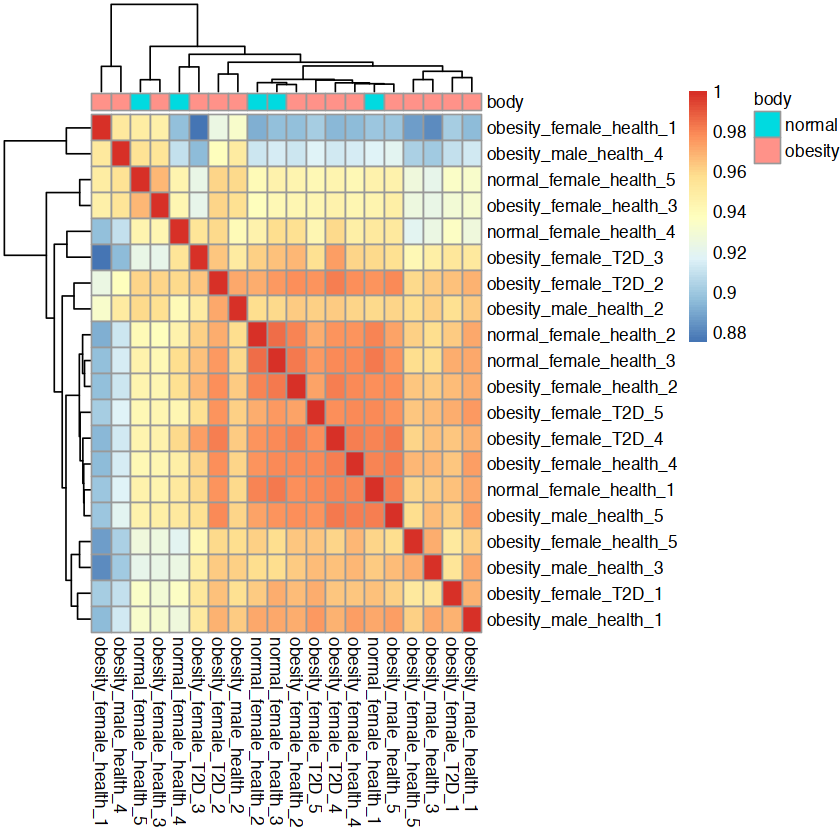

In [8]:
pheatmap(vsd_cor_test1,annotation = select(meta,body))

In [9]:
dds_test1_dt <- DESeq(dds_test1_dt)

using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 1559 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



# 用自带的RAW数据分析
---

raw结果保存在 data/GSE166047_RAW/ 里面

这里存在一个批量导入的问题

In [10]:
t1_path <- getwd() |> paste("/data/GSE166047_RAW/GSM5060703_NW1_S1.dat",sep="") |> file.path()

In [11]:
dt <- read.table(t1_path)
head(dt)



,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,gene_ID,gene_name,locus,frags_locus,frags_expt,FPKM_THN,comp_frags_locus,comp_frags_expt,FPKM_CHN,status
2,ENSG00000000003,TSPAN6,X:100627109-100639991,362,13388472,13.223452,333,8028726,20.284527,OK
3,ENSG00000000005,TNMD,X:100584802-100599885,399,13388472,31.987774,326,8028726,43.582596,OK
4,ENSG00000000419,DPM1,20:50934867-50958555,339,13388472,25.697676,166,8028726,20.983920,OK
5,ENSG00000000457,SCYL3,1:169849631-169894267,329,13388472,7.143470,158,8028726,5.720774,OK
6,ENSG00000000460,C1orf112,1:169662007-169854080,536,13388472,18.726680,46,8028726,2.680021,OK
